<a href="https://colab.research.google.com/gist/Akbro10/f504a1d3778c6b5e80e364ae4aedd376/phy202_akbar-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#All the required libraries 
%matplotlib inline 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
from scipy.stats import boltzmann
from scipy.optimize import fsolve  
import math 
from scipy.constants import pi



In [1]:
#Values of the variables 
T_rot = 585 #Rotational temperature in Kelvin(K)
T_vib = 4530 #Vibrational temperature in kelvin(K)
M = 28.0134 #Mass of the molecule in amu
w_sp = 0.025 #Spectral resolution in nm 
R_sp = 12  #Sample volume of the optical emission in Standard cubic centimetre per minute, SCCM
w_e = 2047.7928  #Vibrational spectroscopic constant cm^-2
Bv = 1.79364   #Rotational constant cm^-1
v1 = 1       #vibrational quantum number for upper vibronic level
v2 = 3       #Vibrational quantum number for lower vibronic level   
J1 = 19      #Rotational quantum number for upper vibronic level  
J2 = 18      #Rotational quantum number for lower vibronic level
A1 = 1       #Electronic state for upper vibronic level   
A2 = 1       #Electronic state for lower vibronic level 
q_v1v2 = 1.980e-1   #Franck-Condon factor 
h = 6.6261*10**-27  #Planck's constant in cm2 g s-1
k = 0.695034800   #Bottzmann's constant in cm^-1/K 
c = 2.99792458*10**10   #Speed of light cm s-1


In [3]:
#Rotational line strength 
def S_J1J2(J2,A2):
  S_J1J2 = (J2+1+A2)*(J2+1-A2)/(J2+1)
  return S_J1J2

S_J1J2 = S_J1J2(J2,A2)
print(S_J1J2)

18.94736842105263


In [8]:
l = np.arange(376,381,0.05)  #Range of wavelength for the graph to be plotted in nm
l_0 = [377,379,380.4]  #Peak of wavelengths for the graph to be plotted in nm 

In [9]:
#To find the intensity of rovibrational spectrum of N_2 plasma, we will define a few functions first 
#This is equation 1 
def w_d(a):       #This is the function for Doppler broadening 
  l,T_rot,M = a 
  w_d = (7.16*10**(-7)*l*(T_rot/M)**0.5)**0.5
  return w_d
w_d = w_d([l,T_rot,M])    #defined w_d as the specific doppler broadening 
print("w_d =", w_d)


#Finding the full width at half maximum of the line, w 
def w(b):           #w function
  w_d,w_sp = b
  w = (w_d**(2) + w_sp**(2))**(0.5)
  return w 
w= w([w_d,w_sp])          
print("w =",w)          #w1 value     


#Now we will be finding the value of a function called "F_l" a lorentzian function 
#Had to write seperate lorentzian functions because of three different peaks


def F_l1(c):
  l,l_0[0],w = c
  F_l1 = (2*w)/(math.pi*(w**2 + 4*(l-l_0[0])**2))
  return F_l1
F_l1 = F_l1([l,l_0[0],w])
print("F_l1 =",F_l1)   

def F_l2(c):
  l,l_0[1],w = c
  F_l2 = (2*w)/(math.pi*(w**2 + 4*(l-l_0[1])**2))
  return F_l2
F_l2 = F_l2([l,l_0[1],w])
print("F_l2 =",F_l2)   

def F_l3(c):
  l,l_0[2],w = c
  F_l3 = (2*w)/(math.pi*(w**2 + 4*(l-l_0[2])**2))
  return F_l3
F_l3 = F_l3([l,l_0[2],w])
print("F_l3 =",F_l3)   

#Finding F_g, a gaussian function 
#Had to write seperate gaussian functions because of three different peaks

def F_g1(d):
  l,l_0[0],w = d
  F_g1 = (4*np.log(2))**0.5 * np.exp((-4*np.log(2)*(l-l_0[0])**2)/w**2)/(w*np.pi**0.5)
  return F_g1
F_g1 = F_g1([l,l_0[0],w])  
print("F_g1 =", F_g1)  

def F_g2(d):
  l,l_0[1],w = d
  F_g2 = (4*np.log(2))**0.5 * np.exp((-4*np.log(2)*(l-l_0[1])**2)/w**2)/(w*np.pi**0.5)
  return F_g2
F_g2 = F_g2([l,l_0[1],w])  
print("F_g2 =", F_g2)  #

def F_g3(d):
  l,l_0[2],w = d
  F_g3 = (4*np.log(2))**0.5 * np.exp((-4*np.log(2)*(l-l_0[2])**2)/w**2)/(w*np.pi**0.5)
  return F_g3
F_g3 = F_g3([l,l_0[2],w])  
print("F_g3 =", F_g3)  


#Finding relative magnitude of gaussian and lorentzian functions

def p(w_d,w):
  p = (w_d**2)/(w**2)
  return p
p = p(w_d,w)
print("p =",p)

#Finding pseudo-voight function F
#Had to write seperate functions for pseudo-voight because of three different peaks

def F1(d):                     
  p,F_g1,F_l1 = d
  F1 = p*F_g1 + (1-p)*F_l1       
  return F1 
F1 = F1([p,F_g1,F_l1])
print("F1 =", F1)


def F2(d):
  p,F_g2,F_l2 = d
  F2 = p*F_g2 + (1-p)*F_l2
  return F2 
F2 = F2([p,F_g2,F_l2])
print("F2 =", F2)

def F3(d):
  p,F_g3,F_l3 = d
  F3= p*F_g3 + (1-p)*F_l3
  return F3 
F3 = F3([p,F_g3,F_l3])
print("F3 =", F3)


#vibrational partition function

def Q_vib1(e):
  h,c,w_e,k,T_vib = e
  Q_vib1 = np.exp(-(h*c*w_e)/(2*k*T_vib))
  return Q_vib1
Q_vib1 = Q_vib1([h,c,w_e,k,T_vib])
print("Q_vib1 =",Q_vib1)

def Q_vib2(e):
  h,c,w_e,k,T_vib = e
  Q_vib2 = 1-np.exp(-(h*c*w_e)/(k*T_vib))
  return Q_vib2
Q_vib2 = Q_vib2([h,c,w_e,k,T_vib])
print("Q_vib2 =",Q_vib2)  

def Q_vib(e):
   h,c,w_e,k,T_vib = e
   Q_vib = Q_vib1/Q_vib2
   return Q_vib
Q_vib = Q_vib([h,c,w_e,k,T_vib])
print(Q_vib)    



w_d = [0.03507502 0.03507735 0.03507969 0.03508202 0.03508435 0.03508668
 0.03508901 0.03509134 0.03509367 0.035096   0.03509833 0.03510067
 0.035103   0.03510533 0.03510766 0.03510999 0.03511232 0.03511464
 0.03511697 0.0351193  0.03512163 0.03512396 0.03512629 0.03512862
 0.03513095 0.03513328 0.0351356  0.03513793 0.03514026 0.03514259
 0.03514492 0.03514724 0.03514957 0.0351519  0.03515422 0.03515655
 0.03515888 0.0351612  0.03516353 0.03516586 0.03516818 0.03517051
 0.03517283 0.03517516 0.03517748 0.03517981 0.03518214 0.03518446
 0.03518678 0.03518911 0.03519143 0.03519376 0.03519608 0.03519841
 0.03520073 0.03520305 0.03520538 0.0352077  0.03521002 0.03521235
 0.03521467 0.03521699 0.03521932 0.03522164 0.03522396 0.03522628
 0.0352286  0.03523093 0.03523325 0.03523557 0.03523789 0.03524021
 0.03524253 0.03524485 0.03524718 0.0352495  0.03525182 0.03525414
 0.03525646 0.03525878 0.0352611  0.03526342 0.03526574 0.03526806
 0.03527038 0.03527269 0.03527501 0.03527733 0.03527965 

In [10]:
#rotational partition function

def Q_rot(f):
  k,T_rot,h,c,Bv = f
  Q_rot = (k*T_rot)/(h*c*Bv)
  return Q_rot
Q_rot = Q_rot([k,T_rot,h,c,Bv])
print("Q_rot =",Q_rot)

#Function for vibrational energy

def G_v1(g):
  w_e,v1 = g
  G_v1 = w_e*(v1+0.5)
  return G_v1
G_v1 = G_v1([w_e,v1])
print("G_v1 =",G_v1)
#Function for rotational energy 

def F_J1(h):
  Bv,J1 = h
  F_J1 = Bv*J1*(J1+1)
  return F_J1
F_J1 = F_J1([Bv,J1]) 
print("F_J1 =",F_J1) 

Q_rot = 1.141165009210829e+18
G_v1 = 3071.6892
F_J1 = 681.5832


I = [1.54522451e-44 1.54440285e-44 1.54358175e-44 1.54276118e-44
 1.54194116e-44 1.54112169e-44 1.54030276e-44 1.53948438e-44
 1.53866654e-44 1.53784924e-44 1.53703248e-44 1.53621627e-44
 1.53540060e-44 1.53458547e-44 1.53377088e-44 1.53295683e-44
 1.53214332e-44 1.53133035e-44 1.53051792e-44 1.52970602e-44
 1.52889467e-44 1.52808386e-44 1.52727358e-44 1.52646384e-44
 1.52565463e-44 1.52484596e-44 1.52403783e-44 1.52323023e-44
 1.52242317e-44 1.52161664e-44 1.52081065e-44 1.52000518e-44
 1.51920026e-44 1.51839586e-44 1.51759200e-44 1.51678867e-44
 1.51598587e-44 1.51518360e-44 1.51438186e-44 1.51358066e-44
 1.51277998e-44 1.51197983e-44 1.51118021e-44 1.51038112e-44
 1.50958256e-44 1.50878452e-44 1.50798702e-44 1.50719004e-44
 1.50639358e-44 1.50559765e-44 1.50480225e-44 1.50400737e-44
 1.50321302e-44 1.50241919e-44 1.50162589e-44 1.50083311e-44
 1.50004085e-44 1.49924912e-44 1.49845790e-44 1.49766721e-44
 1.49687704e-44 1.49608739e-44 1.49529827e-44 1.49450966e-44
 1.49372157e-44 1.49

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

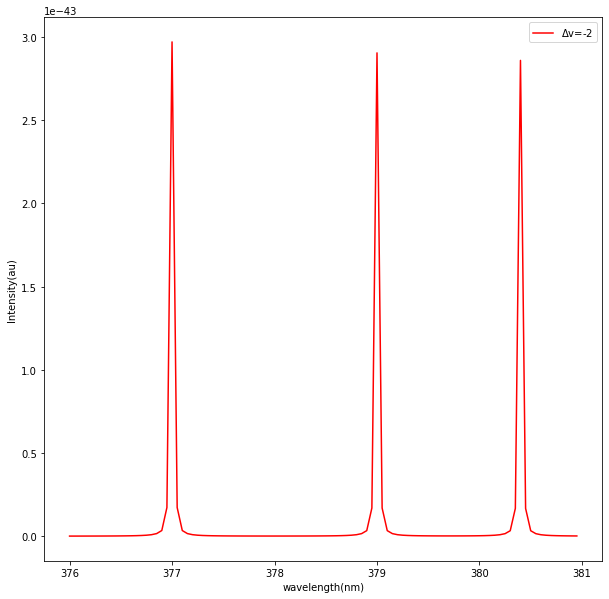

In [13]:
#Individual Intensity 
def I(m):
  R_sp,l,q_v1v2,Q_vib,S_J1J2,Q_rot,G_v1,k,T_vib,F_J1,T_rot = m
  I = (R_sp*q_v1v2*S_J1J2*np.exp((-G_v1)/(k*T_vib))*np.exp((-F_J1)/(k*T_rot)))/(l**4 *Q_vib*Q_rot)
  return I

I = I([R_sp,l,q_v1v2,Q_vib,S_J1J2,Q_rot,G_v1,k,T_vib,F_J1,T_rot])

print("I =",I)
 
#Total intesnity 

def Intensity(i):
  I,F1,F2,F3 = i
  Intensity = I*F1 + I*F2 + I*F3
  return Intensity 

Intensity = Intensity([I,F1,F2,F3])
print("Intensity =",Intensity) 

#To draw the graph 

fig = plt.figure(1,figsize=(10,10))
plt.plot(l,Intensity,label=r'$\Delta$v=-2',color="r",linestyle="-")
plt.xlabel(r"wavelength(nm)")
plt.ylabel(r"Intensity(au)")
plt.legend()

#To save the figure
from google.colab import files
fig.savefig("PHY202_graph",dpi=300)
files.download("PHY202_graph.png") 